Import des librairies et données nécessaires à l'étude:
===

In [1]:
# Librairie de calcul
import pandas as pd

# Librairie de visualisation
import matplotlib.pyplot as plt

# Options globales pour l'output display
pd.options.display.float_format = "{:.3f}".format
colors = ["#b2eca7","#ffcc97","#676283","#72bbff","#d2a0f2","#0abdc0"]

# Import des données
aide_alimentaire_df = pd.read_csv("aide_alimentaire.csv",parse_dates = [1])
dispo_alimentaire_df = pd.read_csv("dispo_alimentaire.csv")
population_df = pd.read_csv("population.csv",parse_dates = [1])
sous_nutrition_df = pd.read_csv("sous_nutrition.csv")
cereales_df = pd.read_csv("cereales.csv")

Renommage des colonnes des différents Dataframe 
===
*(simplification, suppression des colonnes inutiles, homogénisation..)*


In [2]:
dispo_alimentaire_df = dispo_alimentaire_df.rename(columns = {
    "Aliments pour animaux":                                        "Alim_Animale",
    "Autres Utilisations":                                          "Autre_Utilisation",
    "Disponibilité alimentaire (Kcal/personne/jour)":               "Dispo_Alim_kcal_pers_j",
    "Disponibilité alimentaire en quantité (kg/personne/an)":       "Dispo_Alim_kg_pers_an",
    "Disponibilité de matière grasse en quantité (g/personne/jour)":"Dispo_Mat_Grasse_g_pers_j",
    "Disponibilité de protéines en quantité (g/personne/jour)":     "Dispo_Prot_g_pers_j",
    "Disponibilité intérieure":                                     "Dispo_Int",
    "Exportations - Quantité":                                      "Exportations",
    "Importations - Quantité":                                      "Importations",
    "Variation de stock":                                           "Variation_Stock"
})

population_df = population_df.rename(columns = {
    "Année":                                                        "Annee",
    "Valeur":                                                       "Population"
})

sous_nutrition_df = sous_nutrition_df.rename(columns = {
    "Année":                                                        "Annee",
    "Valeur":                                                       "Sous_Nutrition"
})

aide_alimentaire_df = aide_alimentaire_df.rename(columns = {
    "Pays bénéficiaire":                                            "Zone",
    "Année":                                                        "Annee",
    "Valeur":                                                       "Aide_Alim"
})

cereales_df = cereales_df.drop([
                                "Code Domaine",
                                "Domaine",
                                "Code Pays",
                                "Code Produit",
                                "Code Année"],
                              axis=1)

cereales_df = cereales_df.rename(columns={
    "Pays":                                                         "Zone",
    "Année":                                                        "Anne",
    "Unité":                                                        "Unite",
    "Description du symbole":                                       "Description_Symbole"
})

Observation et nettoyage des Dataframes:
===

sous_nutrition_df:
---

In [3]:
sous_nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Zone            1218 non-null   object
 1   Annee           1218 non-null   object
 2   Sous_Nutrition  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


**Les valeurs de "Sous_Nutrition" sont lues comme des objets (object) et non comme des chiffres à virgules (float64) car certaines valent "<0,1". On choisit de les remplacer par 0 en l'absence de plus d'informations (*on aurait pu choisir de le remplacer par 0,1*), il manque aussi des valeurs, il faudra calculer le pourcentage de valeurs manquantes puis les remplacer par 0 pour les calculs.**

**Les dates sont sous la forme "201x-201z", il faut les transformer en "201x+1" d'après le lexique des données.**

In [4]:
# Correction des valeurs dans Sous_Nutrition:
sous_nutrition_df = sous_nutrition_df.replace(to_replace = ["<0.1"],value = 0)
sous_nutrition_df["Sous_Nutrition"] = sous_nutrition_df["Sous_Nutrition"].astype("float64")

# Conversion des dates de "201x-201z" à "201x+1"
sous_nutrition_df["Annee"] = sous_nutrition_df["Annee"].str.slice(0,4)
sous_nutrition_df["Annee"] = sous_nutrition_df["Annee"].astype(int)+1

In [5]:
# Compte des valeurs manquantes:
print(sous_nutrition_df.isnull().sum() * 100 / len(sous_nutrition_df))

Zone              0.000
Annee             0.000
Sous_Nutrition   48.768
dtype: float64


**Il manque 48,77% des valeurs de Sous_Nutrition, c'est important et il faudra en tenir compte lors des analyses.**

In [6]:
# Remplacement des valeurs nulles (NaN) par 0:
sous_nutrition_df["Sous_Nutrition"].fillna(0,inplace = True)

In [7]:
sous_nutrition_df.describe()

,Annee,Sous_Nutrition
count,1218.000,1218.000
mean,2015.500,2.615
std,1.709,14.149
min,2013.000,0.000
25%,2014.000,0.000
50%,2015.500,0.000
75%,2017.000,1.200
max,2018.000,203.800


**La colonne année n'a pas de sens, mais cela donne tout de même un premier aperçu de la répartition des valeurs de Sous_Nutrition.**

aide_alimentaire_df:
---

In [8]:
aide_alimentaire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Zone       1475 non-null   object        
 1   Annee      1475 non-null   datetime64[ns]
 2   Produit    1475 non-null   object        
 3   Aide_Alim  1475 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 46.2+ KB


**Il n'y a pas de valeurs manquantes, les objets sont du bon type, il faut par contre convertir les dates DD/MM/YYYY en YYYY seulement.**

In [9]:
# Conversion des dates:
aide_alimentaire_df["Annee"] = aide_alimentaire_df["Annee"].dt.strftime("%Y")

In [10]:
aide_alimentaire_df.describe()

,Aide_Alim
count,1475.000
mean,7481.967
std,23339.531
min,0.000
25%,287.500
50%,1178.000
75%,4334.500
max,265013.000


**Premier aperçu de la répartition des valeurs d'Aide_Alim.**

population_df:
---

In [11]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Zone        1416 non-null   object        
 1   Annee       1416 non-null   datetime64[ns]
 2   Population  1416 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 33.3+ KB


**Il n'y a pas de valeurs manquantes, les objets sont du bon type, il faut par contre convertir les dates DD/MM/YYYY en YYYY seulement.**

In [12]:
# Conversion des dates:
population_df["Annee"] = population_df["Annee"].dt.strftime("%Y")

In [13]:
population_df.describe()

,Population
count,1416.000
mean,31447.929
std,130081.183
min,0.793
25%,378.341
50%,5126.480
75%,19306.663
max,1427647.786


**Premier aperçu de la répartition des valeurs de Population. Il aurait été intéressant d'avoir la correspondance à la Zone pour certaines valeurs (*min, max...*)**

dispo_alimentaire_df:
---

In [14]:
dispo_alimentaire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Zone                       15605 non-null  object 
 1   Produit                    15605 non-null  object 
 2   Origine                    15605 non-null  object 
 3   Alim_Animale               2720 non-null   float64
 4   Autre_Utilisation          5496 non-null   float64
 5   Dispo_Alim_kcal_pers_j     14241 non-null  float64
 6   Dispo_Alim_kg_pers_an      14015 non-null  float64
 7   Dispo_Mat_Grasse_g_pers_j  11794 non-null  float64
 8   Dispo_Prot_g_pers_j        11561 non-null  float64
 9   Dispo_Int                  15382 non-null  float64
 10  Exportations               12226 non-null  float64
 11  Importations               14852 non-null  float64
 12  Nourriture                 14015 non-null  float64
 13  Pertes                     4278 non-null   flo

**Les valeurs ont le bon type, on doit cependant calculer le pourcentage de valeurs manquantes qui seront ensuite remplacées par 0.**

In [15]:
# Comptage des valeurs manquantes:
print(dispo_alimentaire_df.isnull().sum() * 100 / len(dispo_alimentaire_df))

Zone                         0.000
Produit                      0.000
Origine                      0.000
Alim_Animale                82.570
Autre_Utilisation           64.781
Dispo_Alim_kcal_pers_j       8.741
Dispo_Alim_kg_pers_an       10.189
Dispo_Mat_Grasse_g_pers_j   24.422
Dispo_Prot_g_pers_j         25.915
Dispo_Int                    1.429
Exportations                21.653
Importations                 4.825
Nourriture                  10.189
Pertes                      72.586
Production                  41.173
Semences                    86.600
Traitement                  85.312
Variation_Stock             56.578
dtype: float64


**Il manque beaucoup de données dans certaines colonnes, plus de 80% dans Alim_Animale, Semences et Traitement par exemple. Pour la Dispo_Alim_kcal_pers_j, Dipo_Int et les Importations il manque moins de 10% des valeurs ce qui est une bonne chose puisque beaucoup de calculs vont reposer sur ces données. Il faudra donc rester vigilant selon les calculs effectués.**

In [16]:
# Remplacement des valeurs nulles par 0:
dispo_alimentaire_df.fillna(0,inplace = True)

In [17]:
dispo_alimentaire_df.describe()

,Alim_Animale,Autre_Utilisation,Dispo_Alim_kcal_pers_j,Dispo_Alim_kg_pers_an,Dispo_Mat_Grasse_g_pers_j,Dispo_Prot_g_pers_j,Dispo_Int,Exportations,Importations,Nourriture,Pertes,Production,Semences,Traitement,Variation_Stock
count,15605.000,15605.000,15605.000,15605.000,15605.000,15605.000,15605.000,15605.000,15605.000,15605.000,15605.000,15605.000,15605.000,15605.000,15605.000
mean,83.579,55.432,31.749,7.831,0.970,0.907,631.143,86.649,83.054,312.480,29.074,641.441,9.912,141.281,-6.690
std,1779.289,3013.630,102.961,23.479,3.247,3.144,9002.564,933.435,700.099,4242.855,584.672,9270.864,194.898,3992.568,362.381
min,0.000,0.000,-21.000,-1.930,-0.030,-0.370,-3430.000,-41.000,-201.000,-246.000,0.000,0.000,0.000,-19.000,-39863.000
25%,0.000,0.000,0.000,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,3.000,0.520,0.020,0.020,6.000,0.000,1.000,3.000,0.000,0.000,0.000,0.000,0.000
75%,0.000,0.000,18.000,4.270,0.310,0.350,73.000,4.000,16.000,40.000,0.000,42.000,0.000,0.000,0.000
max,150000.000,347309.000,1711.000,430.760,60.760,54.970,739267.000,42797.000,63381.000,426850.000,55047.000,739267.000,17060.000,326711.000,5284.000


**Premier aperçu de la répartition des valeurs. Il aurait été intéressant d'avoir la correspondance à la Zone pour certaines valeurs (*min, max...*). On trouve des valeurs négatives:** 
* Une ligne concernant le disponibilité alimentaire de l'avoine au Japon, toutes les valeurs sont négatives.
* On retrouve aussi une valeur négative pour le traitement de la viande bovine en Hongrie.
* Certaines Dispo_Int sont négatives (putôt nombreuses).
   *      #faire un choix concernant les corrections 

Définition des constantes et valeurs utilisées régulièrement:
---

In [18]:
BESOIN_KCAL_J = 2500
JOURS_PAR_AN = 365
pop_tot_2017 = round(sum(population_df.loc[(population_df["Annee"]=="2017"),"Population"]*1000),3)

* **Population mondiale en 2017: 7 548 134 111 soit 7,5 milliards**
* **Ces valeurs sont des moyennes, il faudrait pour être précis prendre en compte la tranche d'age, le sexe, l'état de santé ect...** 
    * [référence besoins kcal/personnes/jours moyens](https://www.efsa.europa.eu/fr/press/news/130110)

* *Compte du nombre de zones via nbr_zones = df["Zone"].nunique()*
* *Attention, le nombre de zones variable selon les df:*
    * *174 zones dans dipo_alimentaire_df*
    * *236 zones dans population_df*
    * *203 zones dans sous_nutrition_df*
    * *76 zones dans aide_alimentaire_df*
* *On utilisera donc au besoin la formule adaptée dans les calculs*


QUESTIONS
===

**Proportion de personnes en état de sous-nutrition en 2017:**
---

In [19]:
proportion_sous_nutrition_2017 = round(
                                    (sum(sous_nutrition_df.loc[(sous_nutrition_df["Annee"]==2017),
                                    "Sous_Nutrition"])*1000000)*100
                                    /pop_tot_2017,
                                    3)

print(proportion_sous_nutrition_2017,
      "% de la population mondiale était en état de sous-nutrition en 2017 soit",
      round(proportion_sous_nutrition_2017*pop_tot_2017/100,0),
      "personnes."
      )

7.097 % de la population mondiale était en état de sous-nutrition en 2017 soit 535691078.0 personnes.


**1000000 car valeur par millions d'habitants*

**D'après nos données, 7% de la population mondiale était en sous-nutrition en 2017 soit environ 536 millions de personnes.**

**Les chiffres officels de 2017 approchent plus des [821 millions](https://www.who.int/fr/news/item/11-09-2018-global-hunger-continues-to-rise---new-un-report-says#:~:text=Selon%20le%20rapport%20sur%20l,soit%20une%20personne%20sur%20neuf). Cette différence peut venir des 48,77% de valeurs manquantes dans Sous_Nutrition, dont nous avions parlé lors de l'étude du jeu de données, ces dernières ont été remplacées par 0 d'office mais il est probable qu'elles n'étaient en réalité pas nulles.**

**Nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire mondiale en 2017:**
---

In [20]:
nbr_zones = dispo_alimentaire_df["Zone"].nunique()

dispo_alim_kcal_pers_an = round(sum(dispo_alimentaire_df["Dispo_Alim_kcal_pers_j"])
                                    /nbr_zones* JOURS_PAR_AN
                                    /(BESOIN_KCAL_J*JOURS_PAR_AN)
                                ,3)

print(nbr_zones,"pays sont présents dans nos données")
print("Il est possible de nourrir",dispo_alim_kcal_pers_an,
      "fois la population mondiale soit",round(dispo_alim_kcal_pers_an*pop_tot_2017,0),
      "personnes."
      )

174 pays sont présents dans nos données
Il est possible de nourrir 1.139 fois la population mondiale soit 8597324752.0 personnes.


**Il existe [193](https://www.un.org/fr/about-us/growth-un-membership-1945-present) pays reconnus par l'ONU, hors, comme on peut le voir seulement 174 sont présents dans nos données, de plus la Chine est sur-représentée puisque séparée en quatre régions. On obtient donc un résultat indiquant qu'il serait possible de nourrir 1,139 personne avec la disponibilité alimentaire en 2017 qui n'est probablement pas parfaitement en adéquation avec la réalité mais reste représentatif.**

**Nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire végétale mondiale en 2017:**
---

In [21]:
dispo_alim_veg_kcal_pers_an = round(sum(dispo_alimentaire_df.loc[dispo_alimentaire_df["Origine"]=="vegetale",
                                                                "Dispo_Alim_kcal_pers_j"])
                                      /nbr_zones* JOURS_PAR_AN
                                      /(BESOIN_KCAL_J*JOURS_PAR_AN)
                                 ,3)

print(nbr_zones,"pays sont présents dans nos données")
print("Il est possible de nourrir",dispo_alim_veg_kcal_pers_an,
      "fois la population mondiale soit",
      round(dispo_alim_veg_kcal_pers_an*pop_tot_2017,0),
      "personnes."
      )

174 pays sont présents dans nos données
Il est possible de nourrir 0.917 fois la population mondiale soit 6921638980.0 personnes.


**Il est possible de nourrir la quasi-totalité de la population mondiale seulement avec la disponibilité alimentaire d'origine végétale. Ici on retrouve le même problème que précédemment concernant la représentativité de nos données.**

**L'utilisation de la disponibilité intérieure, en particulier la part attribuée à l'alimentation animale, les pertes, et celle utilisée pour l'alimentation humaine en 2017:**
---

Nourriture          49.510
Traitement          22.385
Alim_Animale        13.242
Autre_Utilisation    8.783
Pertes               4.607
Semences             1.571
dtype: float64


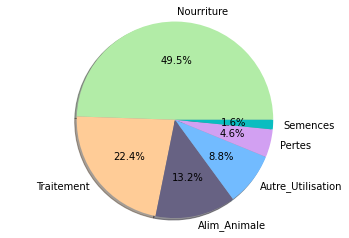

In [22]:
dispo_int_tot = sum(dispo_alimentaire_df["Dispo_Int"])

Use_Dispo_Int = dispo_alimentaire_df.groupby("Dispo_Int")[["Nourriture",
                                                         "Traitement",
                                                         "Alim_Animale",
                                                         "Autre_Utilisation",
                                                         "Pertes",
                                                         "Semences"]].sum()

print(Use_Dispo_Int.sum()*100/dispo_int_tot)

#Sous forme graphique:
data_fig1 = Use_Dispo_Int.sum()
fig1, ax1 = plt.subplots()
ax1.pie(data_fig1,
        labels=["Nourriture","Traitement","Alim_Animale","Autre_Utilisation","Pertes","Semences"],
        autopct="%1.1f%%",
        colors=colors,
        shadow=True)
ax1.axis("equal")
plt.show()

**Environ 50% de la disponibilité intérieure est utilisée pour l'alimentation humaine.**

On remarque également que:
* **Disponibilité intérieure = Nourriture+ Traitement + Alimentation animale + Autres utilisations + Pertes + Semences**

**En effet, ces paramètres additionnés permettent d'atteindre 100% de la disponibilité alimentaire, on en profite donc pour expliquer le lien logique entre l’ensemble des 10 variables exprimées en milliers de tonnes sur les utilisations de la disponibilité intérieure selon une équation du type : A1 + A2 + … = disponibilité intérieure = B1 + B2 + …**

**La première partie correspond donc à l'addition des paramètres ci-dessus**

Les autres variables exprimées en milliers de tonnes sont:
* Les exportations
* Les importations
* La varation des Stock
* La production

In [23]:
alt_dispo_int = dispo_alimentaire_df.groupby("Dispo_Int")[["Production",
                                                           "Exportations",
                                                           "Importations",
                                                           "Variation_Stock"]].sum()

print(alt_dispo_int.sum()*100/dispo_int_tot)

Production        101.631
Exportations       13.729
Importations       13.159
Variation_Stock    -1.060
dtype: float64


**D'apres les chiffres ci-dessus, le lien logique entre la disponibilité intérieure et les variables ci-dessus est du type:**
* **Disponibilité intérieure = Production + Importation - Exportation + Variation des stocks**

**Hors arrondis, si on applique cette équation on arrive en effet à expliquer 100% de la disponibilité intérieure.**

**Pays pour lesquel la proportion des personnes sous-alimentées est la plus forte en 2017:**
---

In [24]:
sous_nut_2017 = sous_nutrition_df.loc[(population_df["Annee"]=="2017"),("Zone","Sous_Nutrition")]

print("Pays ayant la plus grande proportion de personnes sous-alimentées")
print(sous_nut_2017.nlargest(10,"Sous_Nutrition"))

Pays ayant la plus grande proportion de personnes sous-alimentées
                                           Zone  Sous_Nutrition
508                                        Inde         190.100
820                                    Pakistan          24.800
514                                   Indonésie          23.600
772                                     Nigéria          22.800
100                                  Bangladesh          21.500
370                                    Éthiopie          21.100
868                                 Philippines          15.700
952                 République-Unie de Tanzanie          13.400
946  République populaire démocratique de Corée          12.000
580                                       Kenya          11.900


*Nombre de personnes en sous-alimentation par millions d'habitants*

**On retrouve les pays attendus selon le [classsement de 2015](https://fr.wikipedia.org/wiki/Liste_des_pays_par_taux_de_malnutrition) avec quelques irrégulaité, en effet l'Inde semble avoir une valeur très suppérrieure aux autres pays, cependant, les autres valeurs de Sous_Nutrition pour l'Inde pour les autres années sont cohérentes (toutes dans les centaines).**

**Les pays qui ont le plus bénéficié d'aide depuis 2013**
---

In [25]:
pays_beneficiaires = aide_alimentaire_df.groupby(["Zone"])["Aide_Alim"].sum()

print("Pays ayant le plus bénéficié d'aide alimentaire (en tonnes) depuis 2013")
print(pays_beneficiaires.nlargest(10))

Pays ayant le plus bénéficié d'aide alimentaire (en tonnes) depuis 2013
Zone
République arabe syrienne           1858943
Éthiopie                            1381294
Yémen                               1206484
Soudan du Sud                        695248
Soudan                               669784
Kenya                                552836
Bangladesh                           348188
Somalie                              292678
République démocratique du Congo     288502
Niger                                276344
Name: Aide_Alim, dtype: int64


**Sans étonnement on retrouve dans ce classement les pays les plus [pauvres](https://www.banquemondiale.org/fr/topic/poverty/overview) (Soudan du Sud, Niger, République démocratique du Congo, Somalie, Bangladesh...), des pays qui ont souffert, durant la période 2013-2017, d'instabilités politiques importantes voire de guerre (République Arabe Syrienne, Yémen, Soudan), parfois même les deux. Le fait que ces ays aient donc bénéficier de beaucoup d'aide international n'est donc pas surprenant.**

**Les pays ayant le plus et le moins de disponibilité alimentaire par habitant:**
---

In [26]:
# Population en 2013 par pays
Pop_Zone_2013 = population_df.loc[(population_df["Annee"]=="2013"),("Zone","Population")]

# Somme des disponibilités alimentaires par pays:
Dispo_Nourriture_Zone = dispo_alimentaire_df.groupby(["Zone"])[["Nourriture"]].sum() 

# Création d'un DataFrame contenant toutes les données pour le calcul:
pop_dispo_alim_df = pd.merge(Pop_Zone_2013, Dispo_Nourriture_Zone,on=["Zone"])
pop_dispo_alim_df["Dispo_Habitants"] = pop_dispo_alim_df["Nourriture"]/pop_dispo_alim_df["Population"]

#Réponses:
print("Pays ayant le plus de disponibilité par habitants:")
print(pop_dispo_alim_df.nlargest(10, "Dispo_Habitants"))
print("  ")
print("Pays ayant le moins de disponibilité par habitants:")
print(pop_dispo_alim_df.nsmallest(10, "Dispo_Habitants"))



Pays ayant le plus de disponibilité par habitants:
           Zone  Population  Nourriture  Dispo_Habitants
108  Monténégro     626.345     752.000            1.201
2       Albanie    2903.790    3476.000            1.197
78      Irlande    4615.422    5320.000            1.153
95   Luxembourg     542.560     607.000            1.119
64        Grèce   10740.500   11919.000            1.110
58     Finlande    5438.982    5938.000            1.092
138    Roumanie   20132.776   21798.000            1.083
125    Pays-Bas   16843.502   17924.000            1.064
11     Autriche    8556.189    9085.000            1.062
94     Lituanie    3008.934    3169.000            1.053
  
Pays ayant le moins de disponibilité par habitants:
              Zone  Population  Nourriture  Dispo_Habitants
156          Tchad   13220.433    4097.000            0.310
0      Afghanistan   32269.589   10735.000            0.333
170         Zambie   14926.544    5088.000            0.341
55        Éthiopie   95385.

**Le premier classement est plutôt surprenant, on y retrouve des pays européens, plutôt riches mais sans pour autant y voir les plus grandes puissances occidentales, ce qui peut s'expliquer par la forte proportion de valeurs manquantes dans les data set mais aussi par l'importantce de leur population qui fait baisser le ratio.**

**Le second classement en revanche lui est assez attendus, en particulier si on étend à 20 résultats, on retrouve tous les pays les plus précaires en 2013 d'après les dernières données de la FAO compilées [ici](https://fr.wikipedia.org/wiki/Liste_des_pays_par_taux_de_malnutrition).**

Autres informations:
===

**Poduits les plus importés:**
---

In [27]:
produits_importés = dispo_alimentaire_df.groupby(["Produit"])["Importations"].sum()

print(produits_importés.nlargest(10))

Produit
Blé                  185377.000
Maïs                 122691.000
Lait - Excl Beurre   116806.000
Soja                 102082.000
Sucre Eq Brut         61615.000
Huile de Palme        48858.000
Légumes, Autres       43333.000
Orge                  38689.000
Manioc                38370.000
Riz (Eq Blanchi)      37618.000
Name: Importations, dtype: float64


**On retrouve beaucoup de céréales.**

**Pays exportant le plus:**
---

In [28]:
pays_exportateurs = dispo_alimentaire_df.groupby(["Zone","Produit"])["Exportations"].sum()

print(pays_exportateurs.nlargest(10))

Zone                   Produit       
Brésil                 Soja             42797.000
États-Unis d'Amérique  Soja             39184.000
                       Blé              34691.000
Brésil                 Sucre Eq Brut    27728.000
                       Maïs             26780.000
Thaïlande              Manioc           25214.000
États-Unis d'Amérique  Maïs             24655.000
Indonésie              Huile de Palme   23333.000
France                 Blé              21502.000
Canada                 Blé              20704.000
Name: Exportations, dtype: float64


**On voit notamment que la Thaïlande est un grand exportateur de Manioc. On retrouve là encore beaucoup de céréales.**

**Le Manioc en Thaïlande:**
---

In [29]:
# Utilisation globale du Manioc:
use_manioc = dispo_alimentaire_df.loc[(dispo_alimentaire_df["Produit"]=="Manioc")
                                    ,("Nourriture","Alim_Animale")].sum()

print(use_manioc)

Nourriture     100637.000
Alim_Animale    87056.000
dtype: float64


**Le manioc est globalement très utilisé dans l'alimentation humaine mais sert également à l'alimentation animale**

In [30]:
# On ne récupère que la partie concernant le manioc en Thaïlande du DataFrame dispo_alimentaire:
manioc_thailande = dispo_alimentaire_df.loc[(dispo_alimentaire_df["Zone"]=="Thaïlande")
                                            &(dispo_alimentaire_df["Produit"]=="Manioc")].iloc[0]

exportation_manioc = manioc_thailande["Exportations"]/manioc_thailande["Production"]

print(round(exportation_manioc*100,2),
     "% du Manioc produit est exporté soit",
     manioc_thailande["Exportations"],
     "milliers de tonnes.")

# Sous nutrition en 2013 en ThaÏlande:
pop_thai_2013 = Pop_Zone_2013.loc[(Pop_Zone_2013["Zone"]=="Thaïlande")
                                 ,("Population")]

sous_nut_thai_2013 = sous_nutrition_df.loc[(sous_nutrition_df["Annee"]==2013)
                                          &(sous_nutrition_df["Zone"]=="Thaïlande")
                                          ,("Sous_Nutrition")].iloc[0]

proportion_sous_nut_thai_2013 = sous_nut_thai_2013*100/pop_thai_2013*10

print(pop_thai_2013,"milliers de personnes")
print(sous_nut_thai_2013,"millions de personnes")
print(proportion_sous_nut_thai_2013,"% de la population est en sous nutrition en 2013")

83.41 % du Manioc produit est exporté soit 25214.0 milliers de tonnes.
1308   68144.518
Name: Population, dtype: float64 milliers de personnes
6.2 millions de personnes
1308   0.091
Name: Population, dtype: float64 % de la population est en sous nutrition en 2013


**La Thaïlande a donc exporté 83,41% de sa production de manioc vers l'étranger en 2013 soit 25 214 milliers de tonnes. Avec 68144.518 milliers d'habitants et 6,2 millions de personnes en sous-nutrition en 2013, 9,1% de la population en Thaïlande souffrent de sous-nutrition.**

**Ratio consommation de céréales pour l'alimentation humaine ou animale:**
---

Proportion pour l'alimentation animale: 0.46
Proportion pour l'alimentation humaine: 0.54


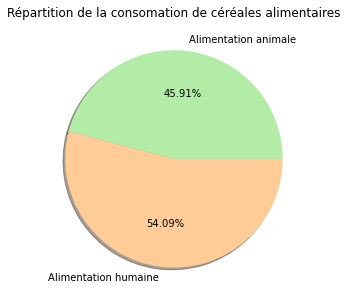

In [31]:
liste_cereales = cereales_df["Produit"].unique()

dispo_cereales = dispo_alimentaire_df[dispo_alimentaire_df["Produit"].isin(liste_cereales)]

proportion_cereales_tot = dispo_cereales[["Alim_Animale","Nourriture"]].sum()

proportion_alim_animale = proportion_cereales_tot.Alim_Animale/proportion_cereales_tot.sum()

print("Proportion pour l'alimentation animale:",round(proportion_alim_animale,2))
print("Proportion pour l'alimentation humaine:",round(1-proportion_alim_animale,2))

#Sous forme graphique:
plt.figure(figsize=(5,5))
fig2 = plt.pie(
    [proportion_alim_animale,1-proportion_alim_animale], 
    labels=["Alimentation animale","Alimentation humaine"],
    autopct=lambda x:str(round(x, 2))+"%",
    colors=colors,
    shadow=True
                )
plot = plt.title("Répartition de la consomation de céréales alimentaires")


**Environ 46% des céréales consommées dans le monde le sont pour l'alimentation animale.**